# Colossus tutorial: The splashback radius

The splashback radius has recently been suggested as a physically motivated definition of the halo boundary. The corresponding Colossus module implements a number of fitting functions for the splashback radius as a function of conventional spherical overdensity definitions, redshift, and mass accretion rate.

In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As always with colossus, we need to set a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15');

First, let's import the splashback module and print the names of all available splashback models:

In [3]:
from colossus.halo import splashback

for model_name in splashback.models:
    print(model_name)

adhikari14
more15
shi16
mansfield17
diemer17


Let's plot the splashback radius predictions of all models as a function of mass accretion rate for a halo with M200m = 1E12 at z = 0. Not all models may be able to predict Rsp at all mass accretion rates, masses, or redshifts, which is why the function returns a mask indicating which input parameters were valid. 

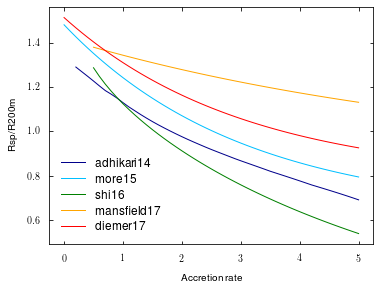

In [4]:
from colossus.lss import peaks

cosmology.setCosmology('planck15')
z = 0.0
M200m = 1E12
nu200m = peaks.peakHeight(M200m, z)
Gamma = np.arange(0.0, 5.1, 0.1)

plt.figure()
plt.xlabel('Accretion rate')
plt.ylabel('Rsp/R200m')
for model_name in splashback.models:
    RspR200m, mask = splashback.splashbackModel('RspR200m', Gamma = Gamma, nu200m = nu200m, z = z, 
                                model = model_name, rspdef = 'percentile75', statistic = 'median')
    plt.plot(Gamma[mask], RspR200m, label = model_name.replace('_', '\_'))
plt.legend();

Note that this comparison is not quite accurate because the definitions of mass accretion rate vary between the models. Some models can also predict the splashback mass and radius based only on mass (or peak height). The capabilities of the models are recorded in the models dictionary which we check to filter for models that can handle 'nu200m' as an input quantity:

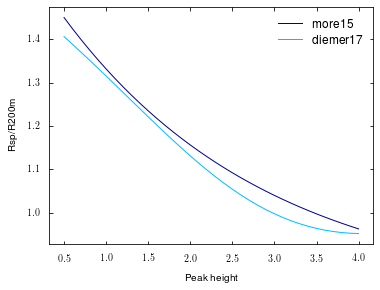

In [5]:
nu200m = np.arange(0.5, 4.1, 0.1)

plt.figure()
plt.xlabel('Peak height')
plt.ylabel('Rsp/R200m')
for model_name in splashback.models:
    if 'nu200m' in splashback.models[model_name].qx:
        RspR200m, mask = splashback.splashbackModel('RspR200m', nu200m = nu200m, z = z, 
                                    model = model_name, rspdef = 'percentile75', statistic = 'median')
        plt.plot(nu200m[mask], RspR200m, label = model_name.replace('_', '\_'))
plt.legend();